<a href="https://colab.research.google.com/github/racoonjonny/Tensorflow_study/blob/main/4_CNN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# CNN은 특징 추출기와 분류기가 합쳐져 있는 형태임
# 특징 추줄기 : 컨볼루션 레이여, 풀링 레이어 등. 이미지 데이터의 특징을 추출하고 압축
# 분류기 : Dense와 Dropout 레이어 등. 정답을 분류하는 역할을 수행함.



In [4]:
# mnist 데이터 불러오기 및 정규화

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 텐서로 변환 (높이, 너비, 채널)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

# 정규화 (Normalization)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [5]:
# CNN 모델 구축

# 모델 생성
cnn = Sequential()

# layer 추가
cnn.add(Conv2D(input_shape = (28,28,1), kernel_size=(3,3), filters= 32, activation= 'relu'))
cnn.add(Conv2D( kernel_size=(3,3), filters= 64, activation= 'relu'))
cnn.add(MaxPool2D(pool_size= (2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten()) # 3차원 텐서를 1차원 텐서로 변환

cnn.add(Dense(128, activation= 'relu')) 
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation= 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [6]:
# 모델 컴파일 및 학습
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size= 128, epochs = 10, validation_data= (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 147s 312ms/step - loss: 0.2495 - accuracy: 0.9237 - val_loss: 0.0510 - val_accuracy: 0.9828
Epoch 2/10
469/469 [==============================] - 145s 310ms/step - loss: 0.0869 - accuracy: 0.9742 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 3/10
469/469 [==============================] - 145s 310ms/step - loss: 0.0635 - accuracy: 0.9810 - val_loss: 0.0353 - val_accuracy: 0.9878
Epoch 4/10
469/469 [==============================] - 146s 311ms/step - loss: 0.0536 - accuracy: 0.9830 - val_loss: 0.0332 - val_accuracy: 0.9894
Epoch 5/10
469/469 [==============================] - 145s 310ms/step - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.0305 - val_accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 145s 310ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.0271 - val_accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 145s 310ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0253 -

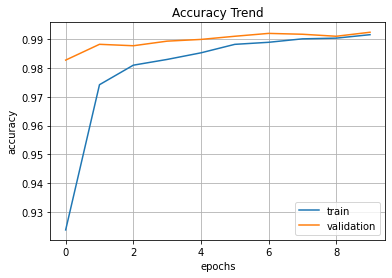

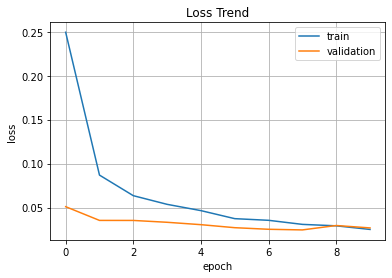

In [7]:
# 정확도 및 손실
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc = 'best')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'best')
plt.grid()
plt.show()